In [1]:
import pandas as pd
from pycaret.classification import *

In [35]:
# 데이터셋 로드
data = pd.read_csv('dataset/updated_starpoint(대중교통통합)(20240514)2km.csv')

data = data[data['bld_type']=='HOUSE']

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,longitude,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.85,59.17,440.09,149.40,16.0,1.0,...,126.779951,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.38,59.92,328.49,163.51,8.0,1.0,...,126.780077,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115
5,서울특별시 구로구 천왕동 산 25-8,3.333333,HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.838662,37.481604,0.102,0.074,0.162,1.028,0.175,1.279,0.142,0.044
7,경기도 고양시 일산동구 중산동 1658-4,4.000000,HOUSE,216.60,128.56,59.35,398.24,183.86,8.0,1.0,...,126.780573,37.685166,0.168,0.023,0.460,0.551,0.073,0.973,0.122,0.036
9,경기도 고양시 일산동구 식사동 1560-4,3.500000,HOUSE,325.00,183.12,56.34,481.91,143.97,2.0,1.0,...,126.815188,37.675535,0.183,0.014,0.510,2.632,0.337,0.091,0.054,0.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,부산광역시 부산진구 전포동 191-689,2.500000,HOUSE,77.94,58.77,75.40,235.06,301.59,8.0,1.0,...,129.070751,35.158877,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.49,0.00,214.30,0.00,7.0,1.0,...,126.892235,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.06,51.80,1260.10,292.12,15.0,1.0,...,126.923358,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.91,57.29,173.95,166.14,1.0,1.0,...,126.923795,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280


<Axes: >

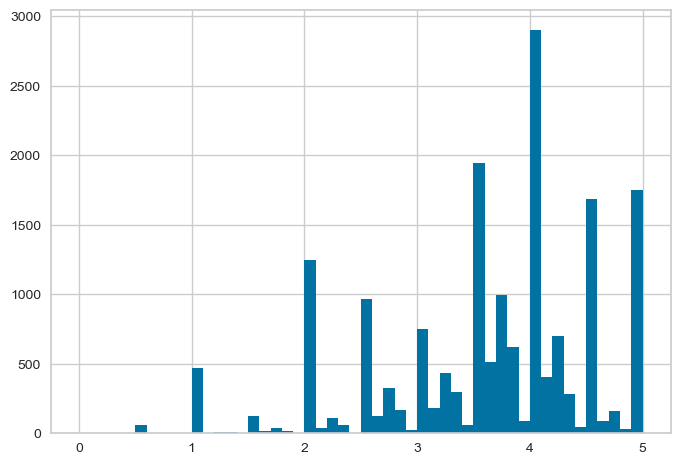

In [13]:
import numpy as np

# 'avg_score'의 최솟값과 최댓값을 기준으로 bins 배열 생성
bins = np.arange(0, data['avg_score'].max() + 0.1, 0.1)

# 히스토그램 그리기
data['avg_score'].hist(bins=bins)

In [36]:
# score 컬럼에 대해 범위 별로 라벨 할당
bins = [0.5, 1.4, 2.3, 3.2, 4.1, 5.0]  # 점수 범위
labels = [0, 1, 2, 3, 4]  # 할당할 라벨
data['label'] = pd.cut(data['avg_score'], bins=bins, labels=labels, include_lowest=True, right=False)

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.85,59.17,440.09,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.38,59.92,328.49,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
5,서울특별시 구로구 천왕동 산 25-8,3.333333,HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.481604,0.102,0.074,0.162,1.028,0.175,1.279,0.142,0.044,3
7,경기도 고양시 일산동구 중산동 1658-4,4.000000,HOUSE,216.60,128.56,59.35,398.24,183.86,8.0,1.0,...,37.685166,0.168,0.023,0.460,0.551,0.073,0.973,0.122,0.036,3
9,경기도 고양시 일산동구 식사동 1560-4,3.500000,HOUSE,325.00,183.12,56.34,481.91,143.97,2.0,1.0,...,37.675535,0.183,0.014,0.510,2.632,0.337,0.091,0.054,0.432,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,부산광역시 부산진구 전포동 191-689,2.500000,HOUSE,77.94,58.77,75.40,235.06,301.59,8.0,1.0,...,35.158877,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033,2
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.49,0.00,214.30,0.00,7.0,1.0,...,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231,1
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.06,51.80,1260.10,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.91,57.29,173.95,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1


<Axes: >

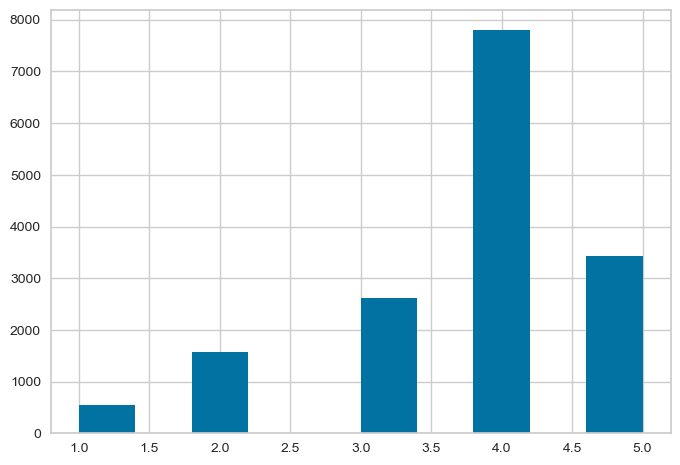

In [4]:
data['label'].hist()

In [5]:
data.columns

Index(['plat_plc', 'avg_score', 'bld_type', 'plat_area', 'arch_area', 'bc_rat',
       'tot_area', 'vl_rat', 'hhld_cnt', 'main_bld_cnt', 'tot_pkng_cnt',
       'official_price', 'crime_rank', 'new_plat_plc', 'longitude', 'latitude',
       'nearest_medical_related', 'nearest_academy_related',
       'nearest_laundry_related', 'nearest_market_related',
       'nearest_park_related', 'nearest_library_related',
       'nearest_school_related', 'nearest_transit_related', 'label'],
      dtype='object')

In [37]:
# 머지된 데이터 프레임 결측치 있는 행 제거 및 지정된 컬럼이 0인 값 제거
data.dropna(axis=0,inplace=True)

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
2,경기도 고양시 일산동구 중산동 1601-2,4.25,HOUSE,211.00,124.85,59.17,440.09,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
4,경기도 고양시 일산동구 중산동 1585-5,4.00,HOUSE,200.90,120.38,59.92,328.49,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
7,경기도 고양시 일산동구 중산동 1658-4,4.00,HOUSE,216.60,128.56,59.35,398.24,183.86,8.0,1.0,...,37.685166,0.168,0.023,0.460,0.551,0.073,0.973,0.122,0.036,3
9,경기도 고양시 일산동구 식사동 1560-4,3.50,HOUSE,325.00,183.12,56.34,481.91,143.97,2.0,1.0,...,37.675535,0.183,0.014,0.510,2.632,0.337,0.091,0.054,0.432,3
13,서울특별시 강남구 대치동 896-12,4.00,HOUSE,258.30,154.53,59.83,870.90,260.10,14.0,1.0,...,37.503155,0.054,0.037,0.036,0.692,0.180,0.622,0.254,0.213,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,부산광역시 부산진구 전포동 191-689,2.50,HOUSE,77.94,58.77,75.40,235.06,301.59,8.0,1.0,...,35.158877,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033,2
24995,서울특별시 구로구 구로동 28-5,1.50,HOUSE,0.00,65.49,0.00,214.30,0.00,7.0,1.0,...,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231,1
24996,서울특별시 영등포구 신길동 449-3,2.00,HOUSE,366.90,190.06,51.80,1260.10,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.50,HOUSE,78.39,44.91,57.29,173.95,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1


In [38]:
# 모든 지정된 컬럼들이 0이 아닌 행만 필터링
filtered_to_use_ai_not_zero = data[(data[['hhld_cnt', 'tot_area', 'bc_rat', 'vl_rat']] != 0).all(axis=1)]

filtered_to_use_ai_not_zero

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
2,경기도 고양시 일산동구 중산동 1601-2,4.25,HOUSE,211.00,124.85,59.17,440.09,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
4,경기도 고양시 일산동구 중산동 1585-5,4.00,HOUSE,200.90,120.38,59.92,328.49,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
7,경기도 고양시 일산동구 중산동 1658-4,4.00,HOUSE,216.60,128.56,59.35,398.24,183.86,8.0,1.0,...,37.685166,0.168,0.023,0.460,0.551,0.073,0.973,0.122,0.036,3
9,경기도 고양시 일산동구 식사동 1560-4,3.50,HOUSE,325.00,183.12,56.34,481.91,143.97,2.0,1.0,...,37.675535,0.183,0.014,0.510,2.632,0.337,0.091,0.054,0.432,3
13,서울특별시 강남구 대치동 896-12,4.00,HOUSE,258.30,154.53,59.83,870.90,260.10,14.0,1.0,...,37.503155,0.054,0.037,0.036,0.692,0.180,0.622,0.254,0.213,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,서울특별시 강서구 화곡동 400-51,2.50,HOUSE,256.10,123.40,48.18,701.03,244.14,13.0,1.0,...,37.538126,0.185,0.050,0.271,0.464,0.170,0.870,0.266,0.022,2
24994,부산광역시 부산진구 전포동 191-689,2.50,HOUSE,77.94,58.77,75.40,235.06,301.59,8.0,1.0,...,35.158877,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033,2
24996,서울특별시 영등포구 신길동 449-3,2.00,HOUSE,366.90,190.06,51.80,1260.10,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.50,HOUSE,78.39,44.91,57.29,173.95,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1


In [39]:
filtered_to_use_ai_not_zero['pkng_cnt_per_hhld_cnt'] = filtered_to_use_ai_not_zero.apply(lambda row: row['tot_pkng_cnt'] / row['hhld_cnt'], axis=1)
# filtered_to_use_ai_not_zero['sigungu'] = filtered_to_use_ai_not_zero['plat_plc'].str.split(' ').str[0]


In [ ]:

# # 총 주차대수, 세대(가구,호) 컬럼 제거
# ai_df=filtered_to_use_ai_not_zero.drop(['bld_type','longitude','latitude','plat_plc','new_plat_plc','avg_score','tot_pkng_cnt', 'hhld_cnt','main_bld_cnt'], axis=1)

# ai_df

In [76]:
ai_df = filtered_to_use_ai_not_zero[[ 'bc_rat', 'vl_rat', 'hhld_cnt', 'tot_pkng_cnt',
       'official_price', 'crime_rank','nearest_medical_related', 'nearest_academy_related', 'nearest_market_related',
       'nearest_park_related', 'nearest_school_related', 'nearest_transit_related', 'label']]

ai_df

,bc_rat,vl_rat,hhld_cnt,tot_pkng_cnt,official_price,crime_rank,nearest_medical_related,nearest_academy_related,nearest_market_related,nearest_park_related,nearest_school_related,nearest_transit_related,label
2,59.17,149.40,16.0,3.0,1192000.0,3,0.162,0.075,0.530,0.044,0.184,0.098,4
4,59.92,163.51,8.0,2.0,1617000.0,3,0.056,0.095,0.665,0.132,0.287,0.115,3
7,59.35,183.86,8.0,8.0,1821000.0,3,0.168,0.023,0.551,0.073,0.122,0.036,3
9,56.34,143.97,2.0,4.0,2345000.0,3,0.183,0.014,2.632,0.337,0.054,0.432,3
13,59.83,260.10,14.0,10.0,11040000.0,5,0.054,0.037,0.692,0.180,0.254,0.213,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,48.18,244.14,13.0,6.0,5097000.0,2,0.185,0.050,0.464,0.170,0.266,0.022,2
24994,75.40,301.59,8.0,0.0,988600.0,5,0.322,0.126,0.935,0.110,0.450,0.033,2
24996,51.80,292.12,15.0,12.0,5478000.0,4,0.081,0.080,0.040,0.317,0.362,0.077,1
24997,57.29,166.14,1.0,1.0,4033000.0,3,0.218,0.163,0.366,0.084,0.220,0.280,1


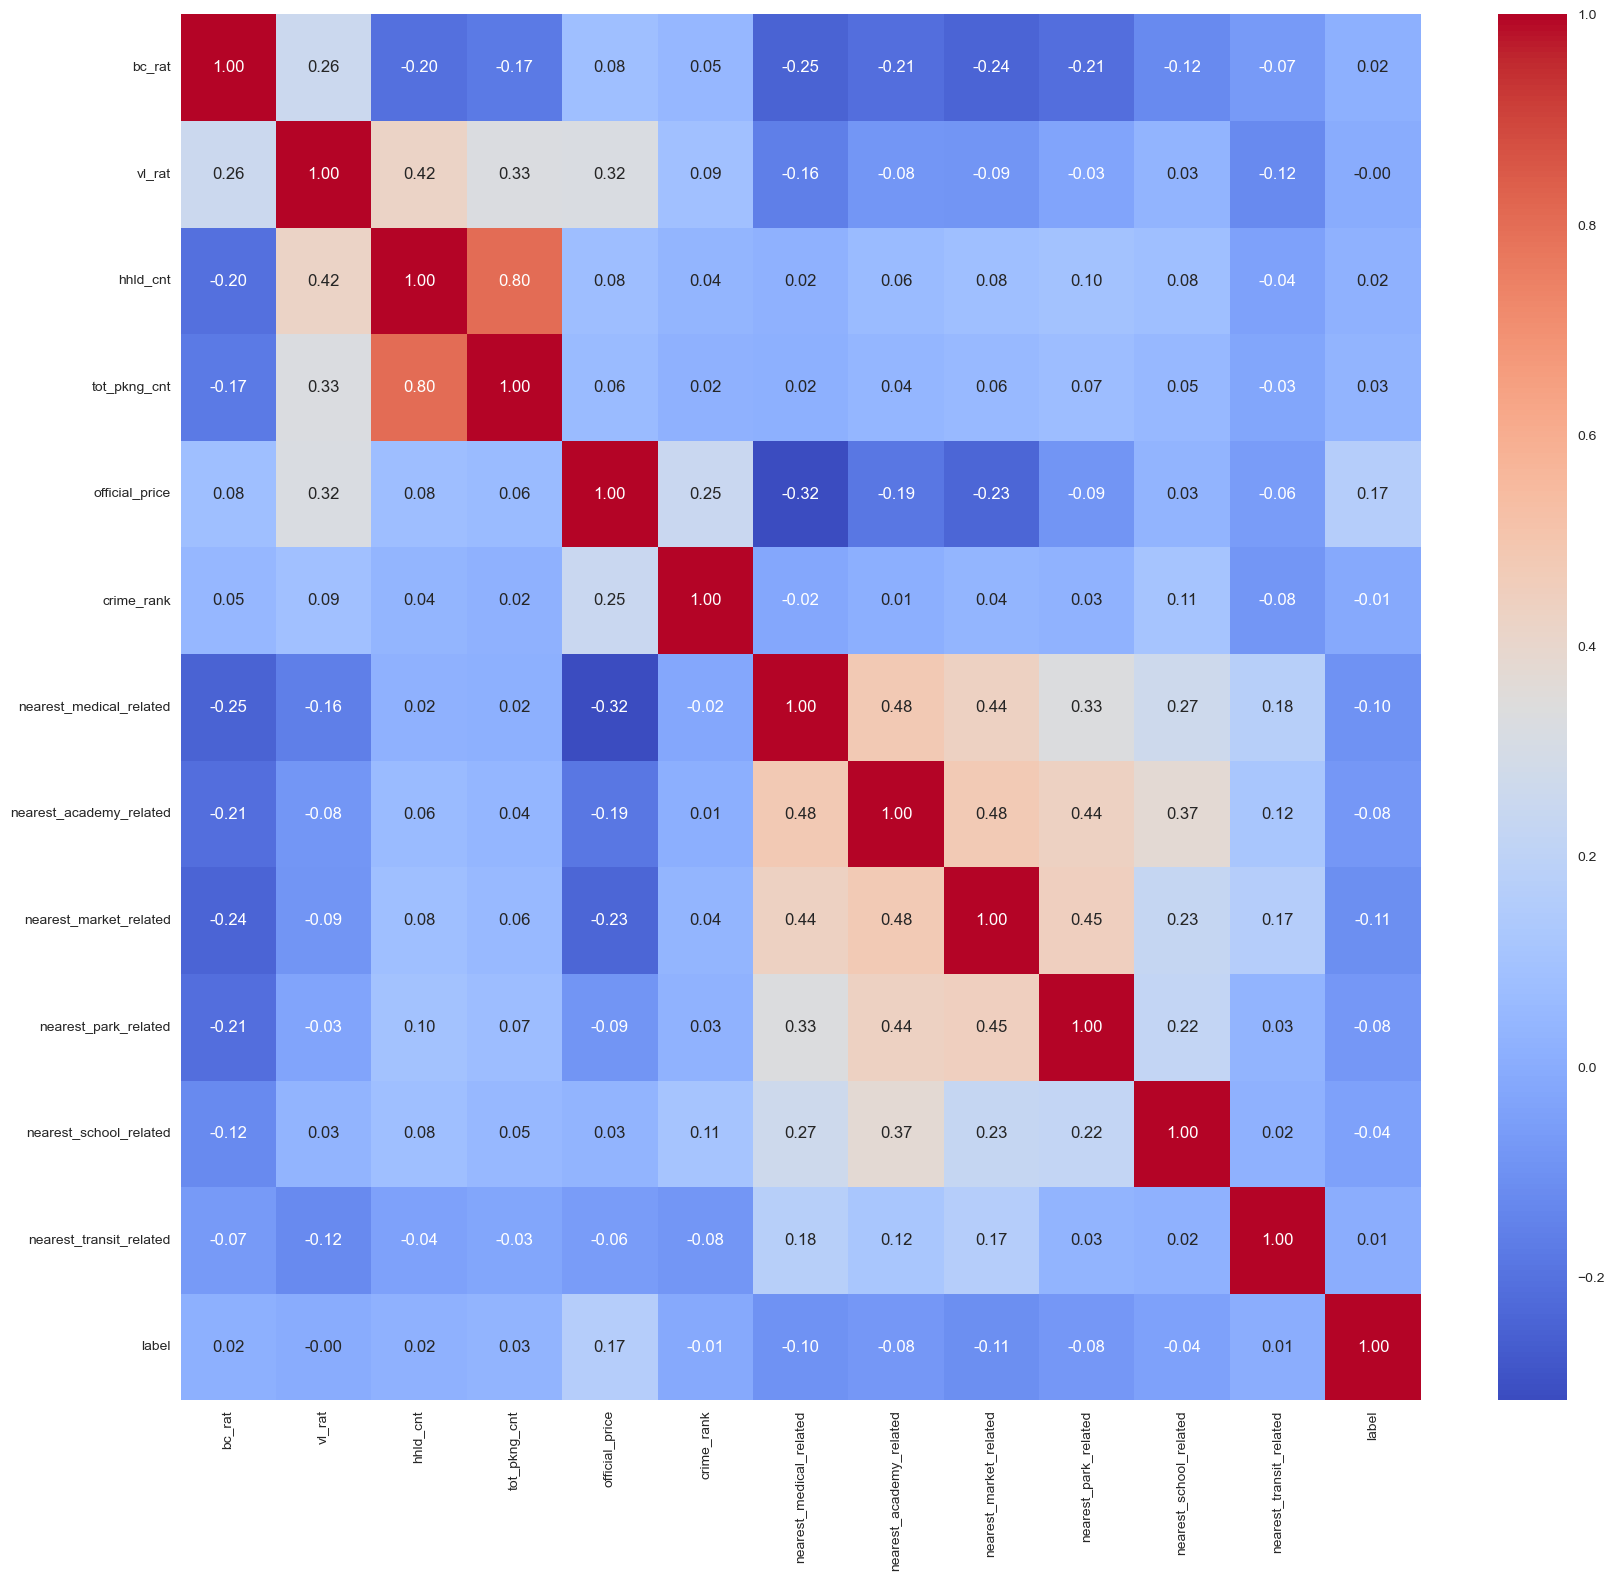

In [80]:
# 레이블과 변수들 간의 상관 계수 계산
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ai_df.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

                    Feature  Importance
4            official_price    0.173658
3              tot_pkng_cnt    0.081932
5                crime_rank    0.079704
7   nearest_academy_related    0.075525
8    nearest_market_related    0.074807
2                  hhld_cnt    0.074532
9      nearest_park_related    0.074011
1                    vl_rat    0.073748
6   nearest_medical_related    0.073457
10   nearest_school_related    0.073020
11  nearest_transit_related    0.072832
0                    bc_rat    0.072772


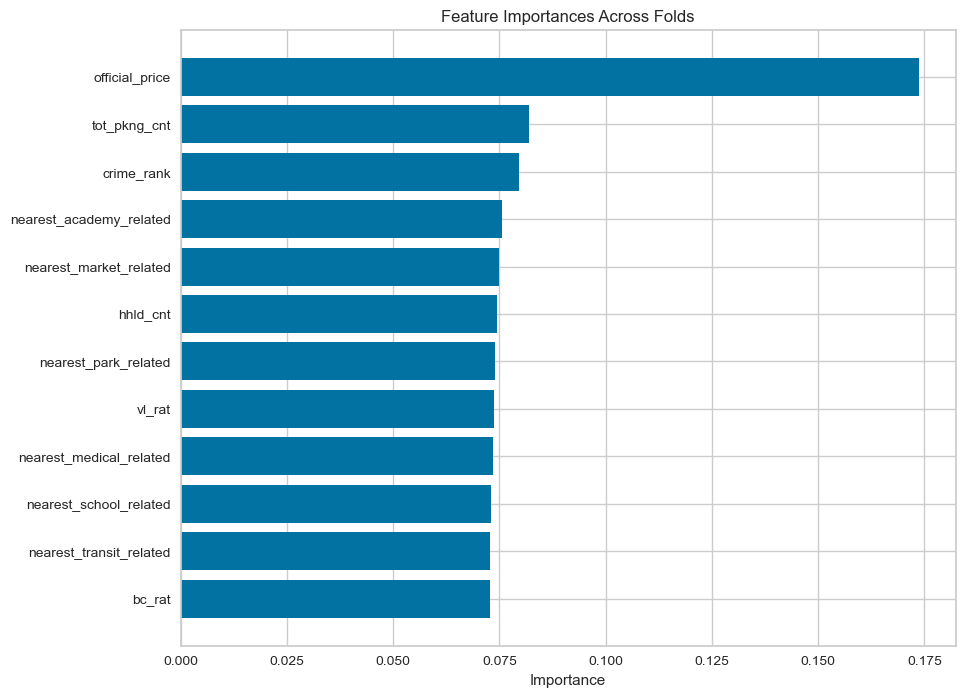

Cross-validated Precision scores: [0.2579793358523197, 0.23513072780143512, 0.2668447107534147, 0.23923577120427514, 0.2860907221446691]
Mean Precision: 25.71%
Cross-validated Recall scores: [0.2368295185046842, 0.2322712960924255, 0.24318402584606144, 0.2384042878868607, 0.24770933153497787]
Mean Recall: 23.97%
Cross-validated Accuracy scores: [0.5042598509052183, 0.4994675186368477, 0.5058572949946751, 0.5021299254526091, 0.5111821086261981]
Mean Accuracy: 50.46%
Cross-validated AUC scores: [0.6236236859041026, 0.6221763885578181, 0.6310137438030211, 0.6233469806389585, 0.63005115922968]
Mean AUC Score: 0.63


In [97]:
# 오버샘플링 없는 버전

import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드
X = ai_df.drop(columns=['label'])
y = ai_df['label']

# 훈련 데이터와 테스트 데이터 분할 (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

# XGBoost 분류기 초기화
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.6,
    num_class=5
)

# 교차 검증 설정
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
auc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# 피처 중요도를 저장할 배열 초기화
feature_importances = np.zeros(X_train.shape[1])

for train_index, test_index in kfold.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 데이터 스케일링 및 모델 피팅
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', xgb_classifier)
    ])
    
    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold)
    
    # 파이프라인에서 XGBClassifier 인스턴스를 추출하고 피처 중요도를 저장
    classifier = pipeline.named_steps['classifier']
    feature_importances += classifier.feature_importances_
    
    y_pred_fold = pipeline.predict(X_test_fold)
    y_prob_fold = pipeline.predict_proba(X_test_fold)
    
    # 혼동 행렬 계산
    conf_mat = confusion_matrix(y_test_fold, y_pred_fold)
    conf_matrices.append(conf_mat)
    
    # 각 폴드에 대한 정밀도와 재현율 계산
    precision_score_fold = precision_score(y_test_fold, y_pred_fold, average='macro')
    recall_score_fold = recall_score(y_test_fold, y_pred_fold, average='macro')

    # 계산된 점수를 리스트에 추가
    precision_scores.append(precision_score_fold)
    recall_scores.append(recall_score_fold)
    
    # Calculate scores for each fold
    auc_score_fold = roc_auc_score(y_test_fold, y_prob_fold, multi_class='ovr')
    auc_scores.append(auc_score_fold)
    
    accuracy_score_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_score_fold)
    
# 폴드의 수로 나누어 평균 중요도를 계산
feature_importances /= kfold.n_splits

# 피처 중요도를 데이터 프레임으로 변환하여 출력
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Across Folds')
plt.gca().invert_yaxis()
plt.show()

print("Cross-validated Precision scores:", precision_scores)
print("Mean Precision: {:.2f}%".format(np.mean(precision_scores) * 100))

print("Cross-validated Recall scores:", recall_scores)
print("Mean Recall: {:.2f}%".format(np.mean(recall_scores) * 100))

print("Cross-validated Accuracy scores:", accuracy_scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(accuracy_scores) * 100))

print("Cross-validated AUC scores:", auc_scores)
print("Mean AUC Score: {:.2f}".format(np.mean(auc_scores)))


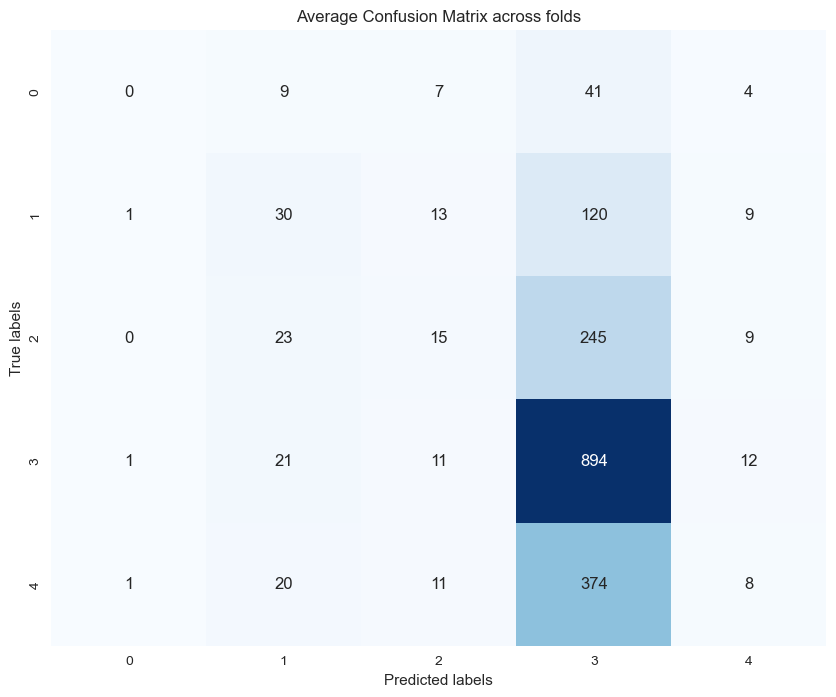

In [98]:
# 교차 검증이 끝난 후, 평균 혼동 행렬 계산
mean_conf_matrix = np.mean(conf_matrices, axis=0)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Average Confusion Matrix across folds')
plt.show()

                    Feature  Importance
4            official_price    0.162818
5                crime_rank    0.110924
3              tot_pkng_cnt    0.108885
2                  hhld_cnt    0.099665
0                    bc_rat    0.082685
10   nearest_school_related    0.065892
6   nearest_medical_related    0.064541
7   nearest_academy_related    0.064315
8    nearest_market_related    0.064050
11  nearest_transit_related    0.059178
9      nearest_park_related    0.058741
1                    vl_rat    0.058307


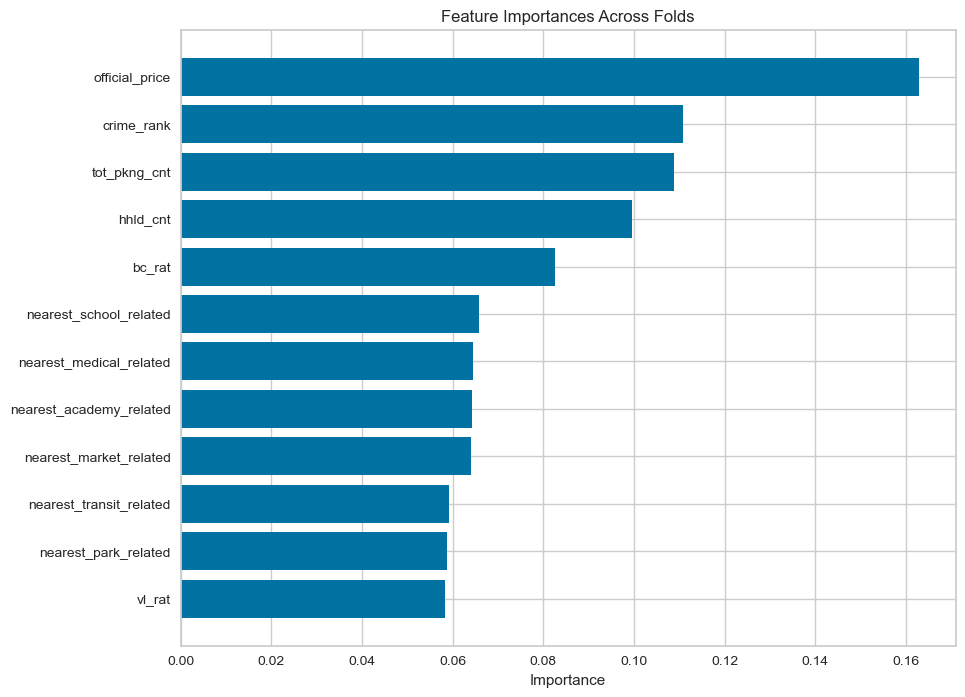

Cross-validated Precision scores: [0.24644722386458437, 0.2637879842841662, 0.257845275888133, 0.2804458804665685, 0.25105215587767765, 0.2597897914042389, 0.24816680190186508, 0.2575349800474382, 0.26820595056004365, 0.26653753994437357]
Mean Precision: 26.00%
Cross-validated Recall scores: [0.27423314234736745, 0.2881185737307665, 0.27537506467271583, 0.29250442759775697, 0.2814053431362591, 0.2902191773778449, 0.2544674639201671, 0.26438130283279965, 0.2916571657797144, 0.30742969743966353]
Mean Recall: 28.20%
Cross-validated Accuracy scores: [0.3961661341853035, 0.4068157614483493, 0.40042598509052185, 0.4291799787007455, 0.4110756123535676, 0.4068157614483493, 0.3855165069222577, 0.40468583599574015, 0.40042598509052185, 0.40468583599574015]
Mean Accuracy: 40.46%
Cross-validated AUC scores: [0.6100583076300113, 0.6094690408558119, 0.6127460605429327, 0.6189738659223104, 0.6110167173923525, 0.6207112235376276, 0.5971341503156662, 0.5957521707343101, 0.6054440358504164, 0.6319177325

In [101]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score,precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
import numpy as np

# 데이터 로드
X = ai_df.drop(columns=['label'])
y = ai_df['label']

# 훈련 데이터와 테스트 데이터 분할 (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

# XGBoost 분류기 초기화
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.6,
    num_class=5
)

# 교차 검증 설정
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
auc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# 피처 중요도를 저장할 배열 초기화
feature_importances = np.zeros(X_train.shape[1])

for train_index, test_index in kfold.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # SMOTE 적용
    smote = SMOTE(random_state=1234)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)
    
    # 데이터 오버샘플링 및 모델 피팅
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', xgb_classifier)
    ])
    
    pipeline.fit(X_train_res, y_train_res)
    
    # 파이프라인에서 XGBClassifier 인스턴스를 추출하고 피처 중요도 저장
    classifier = pipeline.named_steps['classifier']
    feature_importances += classifier.feature_importances_
    
    y_pred_fold = pipeline.predict(X_test_fold)
    
    # 혼동 행렬 계산
    conf_mat = confusion_matrix(y_test_fold, y_pred_fold)
    conf_matrices.append(conf_mat)
    
    # 각 폴드에 대한 정밀도와 재현율 계산
    precision_score_fold = precision_score(y_test_fold, y_pred_fold, average='macro')
    recall_score_fold = recall_score(y_test_fold, y_pred_fold, average='macro')

    # 계산된 점수를 리스트에 추가
    precision_scores.append(precision_score_fold)
    recall_scores.append(recall_score_fold)
    
    y_prob_fold = pipeline.predict_proba(X_test_fold)
    
    # 교차검증 진행후, 지표
    auc_score_fold = roc_auc_score(y_test_fold, y_prob_fold, multi_class='ovr')
    auc_scores.append(auc_score_fold)
    
    accuracy_score_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_score_fold)
    
# 폴드의 수로 나누어 평균 중요도를 계산
feature_importances /= kfold.n_splits

# 피처 중요도를 데이터 프레임으로 변환하여 출력
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Across Folds')
plt.gca().invert_yaxis()
plt.show()

print("Cross-validated Precision scores:", precision_scores)
print("Mean Precision: {:.2f}%".format(np.mean(precision_scores) * 100))

print("Cross-validated Recall scores:", recall_scores)
print("Mean Recall: {:.2f}%".format(np.mean(recall_scores) * 100))

print("Cross-validated Accuracy scores:", accuracy_scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(accuracy_scores) * 100))

print("Cross-validated AUC scores:", auc_scores)
print("Mean AUC Score: {:.2f}".format(np.mean(auc_scores)))


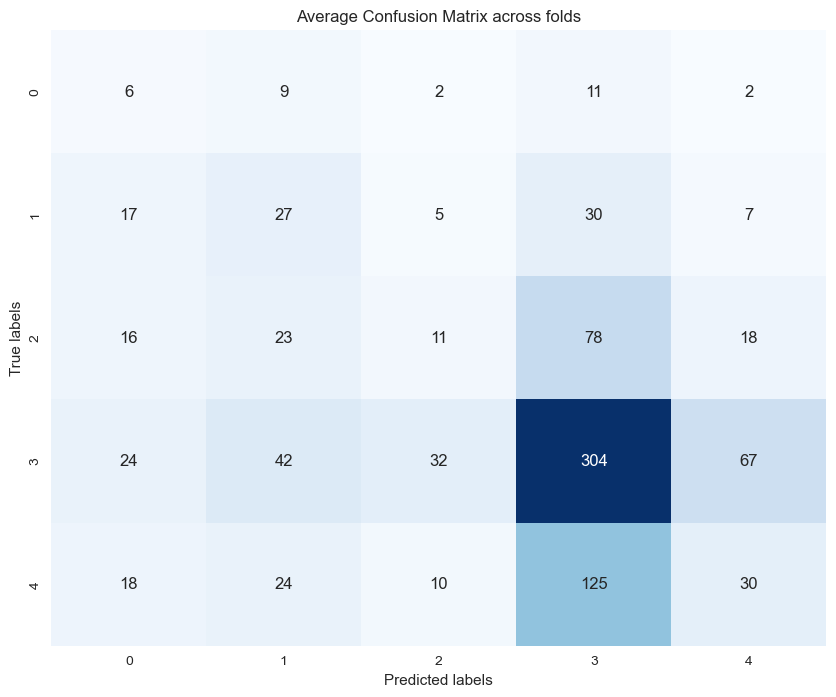

In [92]:
# 교차 검증이 끝난 후, 평균 혼동 행렬 계산
mean_conf_matrix = np.mean(conf_matrices, axis=0)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Using SMOTE Average Confusion Matrix across folds')
plt.show()

In [ ]:
import pandas as pd

# 예측 결과와 실제 레이블을 DataFrame으로 생성
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_0': y_prob[:, 0],
    'Probability_1': y_prob[:, 1],
    'Probability_2': y_prob[:, 2],
    'Probability_3': y_prob[:, 3],
    'Probability_4': y_prob[:, 4]
})
 
# DataFrame을 CSV 파일로 저장
results_df.to_csv('prediction_results_xgb_model.csv', index=False)


In [ ]:
import pickle

# 모델을 .pkl 파일로 저장
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)
